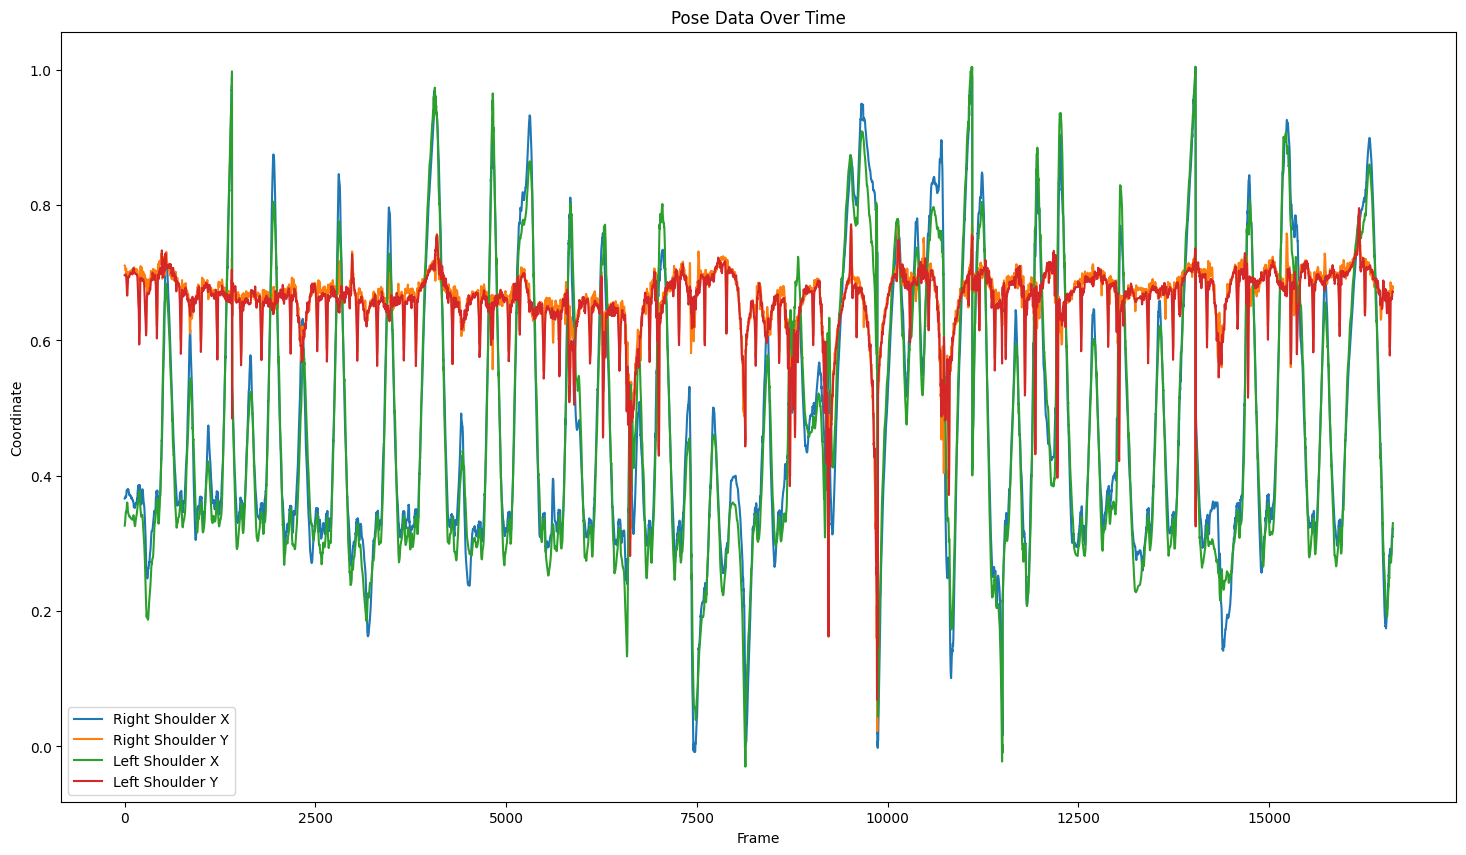

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Carrega os dados salvos
pose_df = pd.read_csv('../data/pose_data_video_2.csv')

# Plotando as coordenadas X e Y de um ponto específico (por exemplo, o ombro direito)
plt.figure(figsize=(18, 10))
plt.plot(pose_df['x_13'], label='Right Shoulder X')
plt.plot(pose_df['y_13'], label='Right Shoulder Y')
plt.plot(pose_df['x_14'], label='Left Shoulder X')
plt.plot(pose_df['y_14'], label='Left Shoulder Y')
plt.xlabel('Frame')
plt.ylabel('Coordinate')
plt.legend()
plt.title('Pose Data Over Time')
plt.show()


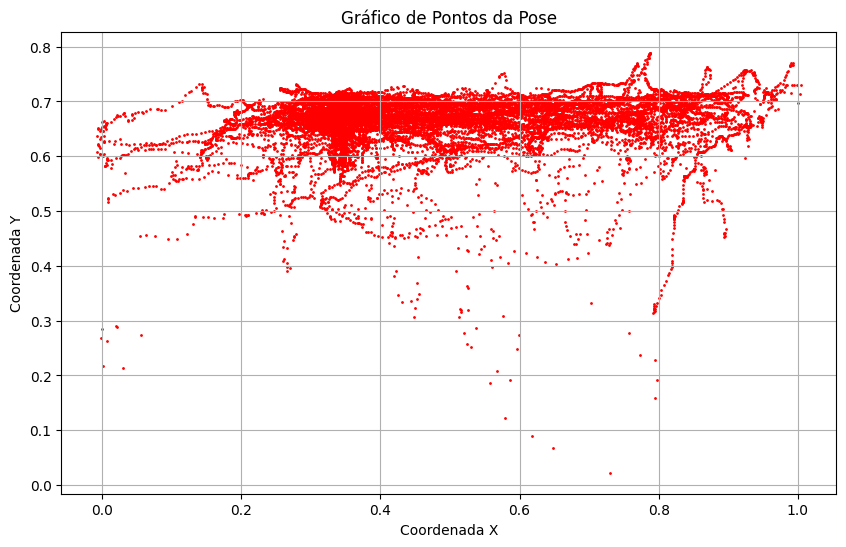

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotar o gráfico de pontos
plt.figure(figsize=(10, 6))
plt.scatter(pose_df['x_13'], pose_df['y_13'], c='red', marker='o', s=1)  # c: cor, marker: estilo do ponto
# plt.scatter(pose_df['x_14'], pose_df['y_14'], c='blue', marker='o', s=1)  # c: cor, marker: estilo do ponto

# Adicionar títulos e rótulos
plt.title('Gráfico de Pontos da Pose')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Adicionar uma grade
plt.grid(True)


# Adicionar números de frame aos pontos
# for i, row in pose_df.iterrows():
#     plt.annotate(f'{row["frame"]}', (row['x_13'], row['y_14']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='black')

# Exibir o gráfico
plt.show()


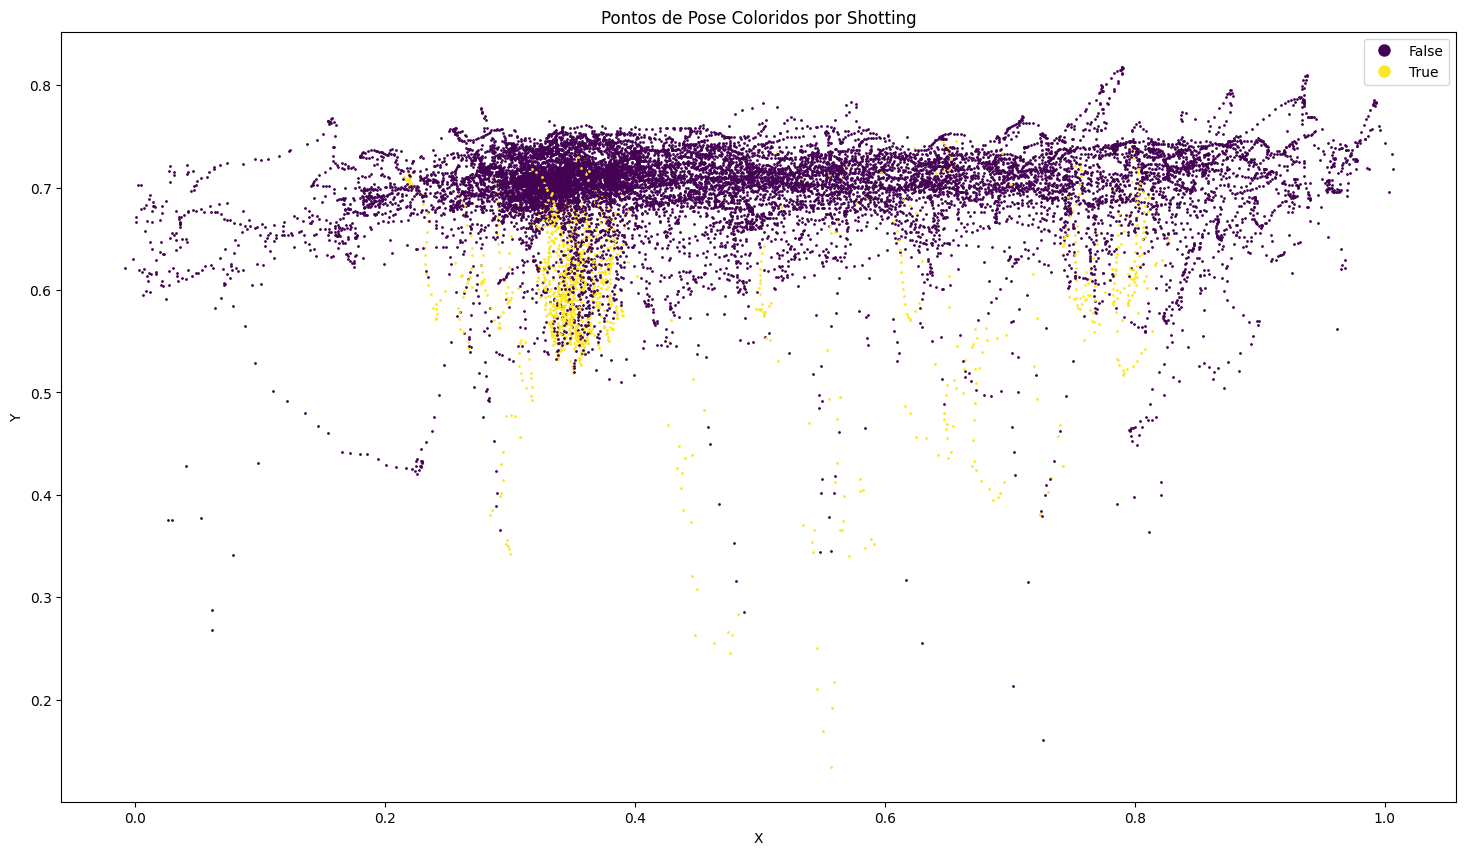

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que pose_df seja o seu DataFrame e já contém a coluna 'shotting'
# Exemplo de estrutura do DataFrame:
# pose_df = pd.DataFrame({
#     'x_0': [...],
#     'y_0': [...],
#     'shotting': [...]  # A coluna que define a cor dos pontos
# })

# Cria um mapeamento de cores baseado nos valores da coluna 'shotting'
unique_shotting_values = pose_df['shotting'].unique()
colors = plt.get_cmap('viridis', len(unique_shotting_values))  # Usa o colormap 'viridis'

color_map = {val: colors(i) for i, val in enumerate(unique_shotting_values)}

# Configura o gráfico
plt.figure(figsize=(18, 10))

# Itera sobre cada ponto e plota com a cor correspondente
for index, row in pose_df.iterrows():
    x = row['x_15']  # Supondo que você está interessado apenas no primeiro ponto para simplificação
    y = row['y_15']
    color = color_map[row['shotting']]
    plt.scatter(x, y, color=color, label=row['shotting'], s=1)

# Adiciona uma legenda para identificar as categorias
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[val], markersize=10, label=val)
           for val in unique_shotting_values]
plt.legend(handles=handles)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pontos de Pose Coloridos por Shotting')
plt.show()


In [6]:
# calcular os angulos 

import numpy as np
import pandas as pd


angles = [
    (16, 14, 12),
    (15, 13, 11),
    (12, 24, 26),
    (11, 23, 25),
    (24, 26, 28),
    (23, 25, 27),
    (16, 12, 24),
    (15, 11, 23)
]

df = pd.read_csv('../data/pose_data_video_2.csv')

# Função para calcular o ângulo entre três pontos
def calcular_angulo(a, b, c):
    # Vetores formados pelos pontos
    ba = np.array([df[f'x_{a}'] - df[f'x_{b}'], df[f'y_{a}'] - df[f'y_{b}']]).T
    bc = np.array([df[f'x_{c}'] - df[f'x_{b}'], df[f'y_{c}'] - df[f'y_{b}']]).T

    # Produto escalar
    cosine_angle = np.sum(ba * bc, axis=1) / (np.linalg.norm(ba, axis=1) * np.linalg.norm(bc, axis=1))
    
    # Calcular o ângulo e converter de radianos para graus
    angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    return np.degrees(angle)

angle_columns = []

# Criar uma nova coluna no DataFrame para cada ângulo
for (a, b, c) in angles:
    angle_column = f'angle_{a}_{b}_{c}'
    angle_columns.append(angle_column)
    df[angle_column] = calcular_angulo(a, b, c)

df


,x_0,y_0,z_0,visibility_0,x_1,y_1,z_1,visibility_1,x_2,y_2,...,frame,shotting,angle_16_14_12,angle_15_13_11,angle_12_24_26,angle_11_23_25,angle_24_26_28,angle_23_25_27,angle_16_12_24,angle_15_11_23
0,0.361190,0.627815,-0.091503,0.999995,0.361966,0.621935,-0.084851,0.999989,0.362560,0.621956,...,143,False,155.342909,167.300724,178.296157,167.540143,176.140955,164.062326,3.140194,13.116375
1,0.361355,0.628048,-0.086477,0.999994,0.362146,0.622193,-0.079420,0.999988,0.362755,0.622271,...,144,False,155.145372,167.247184,178.427469,167.775851,176.682542,165.211648,2.816729,13.019395
2,0.361315,0.628416,-0.089592,0.999995,0.362165,0.622465,-0.081577,0.999989,0.362817,0.622629,...,145,False,154.751435,166.816145,178.478126,167.665637,176.976270,166.137288,2.156956,13.209662
3,0.361683,0.628796,-0.079590,0.999995,0.362586,0.622717,-0.072176,0.999988,0.363226,0.622891,...,146,False,154.057107,164.610044,178.282434,167.492852,177.171939,167.687058,1.017640,14.354956
4,0.361940,0.628925,-0.073208,0.999995,0.362927,0.622811,-0.065722,0.999989,0.363589,0.622994,...,147,False,153.620123,162.217222,178.577712,167.196629,177.670650,169.254313,0.017324,15.169428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16618,0.331389,0.623767,-0.004338,0.999909,0.330538,0.619170,-0.000310,0.999797,0.330421,0.619098,...,18203,False,150.177522,168.946099,174.457628,178.440257,167.070467,155.407756,15.706967,6.520894
16619,0.333436,0.623461,0.002716,0.999906,0.332323,0.618886,0.006528,0.999788,0.332054,0.618818,...,18204,False,154.399603,167.307546,176.246037,179.774870,168.870080,158.613027,14.127745,7.176008
16620,0.334611,0.623403,-0.001292,0.999913,0.333694,0.618826,0.002919,0.999802,0.333564,0.618745,...,18205,False,159.283532,164.461181,177.201014,178.374328,166.416591,157.991028,12.839980,9.266164
16621,0.336587,0.623234,0.001314,0.999909,0.335644,0.618671,0.005066,0.999792,0.335453,0.618598,...,18206,False,159.772373,169.382224,178.621022,176.912115,168.799324,158.041442,12.138259,6.629664


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que pose_df seja o seu DataFrame e já contém a coluna 'shotting'
# Exemplo de estrutura do DataFrame:
# pose_df = pd.DataFrame({
#     'x_0': [...],
#     'y_0': [...],
#     'shotting': [...]  # A coluna que define a cor dos pontos
# })

# Cria um mapeamento de cores baseado nos valores da coluna 'shotting'
unique_shotting_values = df['shotting'].unique()
colors = plt.get_cmap('viridis', len(unique_shotting_values))  # Usa o colormap 'viridis'

color_map = {val: colors(i) for i, val in enumerate(unique_shotting_values)}

# Configura o gráfico
plt.figure(figsize=(18, 10))

# Itera sobre cada ponto e plota com a cor correspondente
for index, row in df.iterrows():
    x = row['angle_16_12_24']  # Supondo que você está interessado apenas no primeiro ponto para simplificação
    y = row['frame']
    color = color_map[row['shotting']]
    plt.scatter(x, y, color=color, label=row['shotting'], s=3)

# Adiciona uma legenda para identificar as categorias
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[val], markersize=10, label=val)
           for val in unique_shotting_values]
plt.legend(handles=handles)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pontos de Pose Coloridos por Shotting')
plt.show()


KeyboardInterrupt: 

In [8]:
df[angle_columns + ['shotting']].to_csv('../data/angles.csv', index=False)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregue o DataFrame
pose_df = pd.read_csv('../data/angles.csv')

# Selecione as características (features) e rótulos (labels)
features = pose_df.drop(columns=['shotting'])  # Exclua a coluna 'frame' e 'shotting'
labels = pose_df['shotting']  # A coluna 'shotting' é o rótulo

# Normaliza os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)


In [10]:
features

,angle_16_14_12,angle_15_13_11,angle_12_24_26,angle_11_23_25,angle_24_26_28,angle_23_25_27,angle_16_12_24,angle_15_11_23
0,155.342909,167.300724,178.296157,167.540143,176.140955,164.062326,3.140194,13.116375
1,155.145372,167.247184,178.427469,167.775851,176.682542,165.211648,2.816729,13.019395
2,154.751435,166.816145,178.478126,167.665637,176.976270,166.137288,2.156956,13.209662
3,154.057107,164.610044,178.282434,167.492852,177.171939,167.687058,1.017640,14.354956
4,153.620123,162.217222,178.577712,167.196629,177.670650,169.254313,0.017324,15.169428
...,...,...,...,...,...,...,...,...
16618,150.177522,168.946099,174.457628,178.440257,167.070467,155.407756,15.706967,6.520894
16619,154.399603,167.307546,176.246037,179.774870,168.870080,158.613027,14.127745,7.176008
16620,159.283532,164.461181,177.201014,178.374328,166.416591,157.991028,12.839980,9.266164
16621,159.772373,169.382224,178.621022,176.912115,168.799324,158.041442,12.138259,6.629664


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Crie e treine o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avalie o modelo
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9774436090225563
              precision    recall  f1-score   support

       False       0.98      0.99      0.99      3043
        True       0.89      0.83      0.86       282

    accuracy                           0.98      3325
   macro avg       0.94      0.91      0.93      3325
weighted avg       0.98      0.98      0.98      3325



In [12]:
import joblib

# Salve o modelo
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [13]:
len(features.columns)

8